In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [15]:
# Carregar os dados
data = pd.read_csv("/content/heart.csv")

print(data)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [16]:
# Dividir os dados em features (X) e rótulos (y)
X = data.drop('target', axis=1).values  # Features
y = data['target'].values  # Rótulos


In [17]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Padronizar as features (opcional, mas recomendado)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Converter para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [20]:
# Criar DataLoader para os dados de treinamento e teste
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32)


In [21]:
# Definir a arquitetura do modelo
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out



In [22]:
# Definir os parâmetros do modelo
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(pd.unique(y))  # Número de classes

# Inicializar o modelo, função de perda e otimizador
model = Model(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [23]:
# Função para treinar o modelo e retornar o histórico da perda
def train_model(model, criterion, optimizer, train_loader, num_epochs=10):
    train_loss_history = []  # Lista para armazenar a perda de treinamento a cada época
    for epoch in range(num_epochs):
        model.train()  # Define o modelo em modo de treinamento
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        train_loss_history.append(epoch_loss)  # Registra a perda média da época
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    return train_loss_history

Epoch [1/50], Loss: 0.5883
Epoch [2/50], Loss: 0.4782
Epoch [3/50], Loss: 0.4099
Epoch [4/50], Loss: 0.3691
Epoch [5/50], Loss: 0.3499
Epoch [6/50], Loss: 0.3363
Epoch [7/50], Loss: 0.3201
Epoch [8/50], Loss: 0.3064
Epoch [9/50], Loss: 0.3031
Epoch [10/50], Loss: 0.2971
Epoch [11/50], Loss: 0.2893
Epoch [12/50], Loss: 0.2828
Epoch [13/50], Loss: 0.2831
Epoch [14/50], Loss: 0.2723
Epoch [15/50], Loss: 0.2654
Epoch [16/50], Loss: 0.2645
Epoch [17/50], Loss: 0.2584
Epoch [18/50], Loss: 0.2563
Epoch [19/50], Loss: 0.2473
Epoch [20/50], Loss: 0.2439
Epoch [21/50], Loss: 0.2374
Epoch [22/50], Loss: 0.2378
Epoch [23/50], Loss: 0.2293
Epoch [24/50], Loss: 0.2263
Epoch [25/50], Loss: 0.2264
Epoch [26/50], Loss: 0.2183
Epoch [27/50], Loss: 0.2101
Epoch [28/50], Loss: 0.2106
Epoch [29/50], Loss: 0.2033
Epoch [30/50], Loss: 0.2025
Epoch [31/50], Loss: 0.1945
Epoch [32/50], Loss: 0.1971
Epoch [33/50], Loss: 0.1886
Epoch [34/50], Loss: 0.1833
Epoch [35/50], Loss: 0.1818
Epoch [36/50], Loss: 0.1734
E

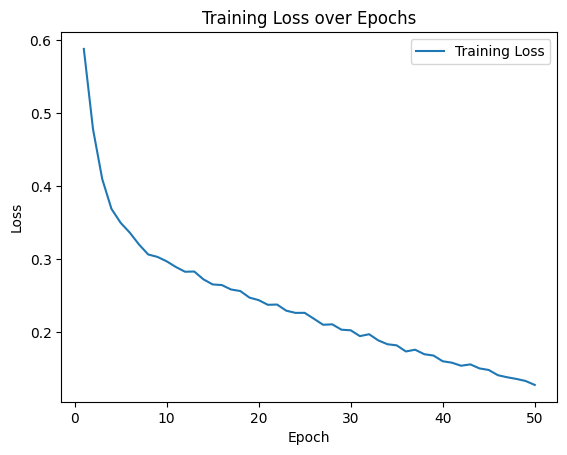

In [24]:
# Treinar o modelo e obter o histórico da perda
train_loss_history = train_model(model, criterion, optimizer, train_loader, num_epochs=50)

# Plotar a curva de aprendizado
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


In [25]:
# Avaliar o modelo
model.eval()
with torch.no_grad():
    all_predictions = []
    all_targets = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.tolist())
        all_targets.extend(labels.tolist())


In [26]:
# Calcular a acurácia
accuracy = accuracy_score(all_targets, all_predictions)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(all_targets, all_predictions)
print('Matriz de Confusão:')
print(conf_matrix)

Acurácia no conjunto de teste: 0.91
Matriz de Confusão:
[[145  14]
 [ 13 136]]
